In [1]:
from parser import Parser, ASTNode, Token
from lexer import lexer
from utils import print_ast, ast_to_networkx, generate_rpn, generate_bytecode
from semantic_analyzer import SemanticAnalyzer

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
tokens = [
    Token('NUMBER', '3'),
    Token('PLUS', '+'),
    Token('NUMBER', '5'),
    Token('MUL', '*'),
    Token('LPAREN', '('),
    Token('NUMBER', '2'),
    Token('MINUS', '-'),
    Token('NUMBER', '8'),
    Token('RPAREN', ')'),
    Token('EOF', '')
]

parser = Parser(tokens)
ast = parser.parse()



print_ast(ast)

PLUS: None
  NUMBER: 3
  MUL: None
    NUMBER: 5
    MINUS: None
      NUMBER: 2
      NUMBER: 8


In [4]:
# Test 1
input_expr = "3 + 5 * (2 - 8)"
tokens = list(lexer(input_expr))
parser = Parser(tokens)
ast = parser.parse()

print_ast(ast)


PLUS: None
  NUMBER: 3
  MUL: None
    NUMBER: 5
    MINUS: None
      NUMBER: 2
      NUMBER: 8


Visiting plus node: None
Visiting binary_op node: None
Visiting number node: 3 and node type is NUMBER
Visiting mul node: None
Visiting binary_op node: None
Visiting number node: 5 and node type is NUMBER
Visiting minus node: None
Visiting binary_op node: None
Visiting number node: 2 and node type is NUMBER
Visiting number node: 8 and node type is NUMBER
The type of the first child is number the type of the second child is number.
The type of the first child is number the type of the second child is number.
The type of the first child is number the type of the second child is number.


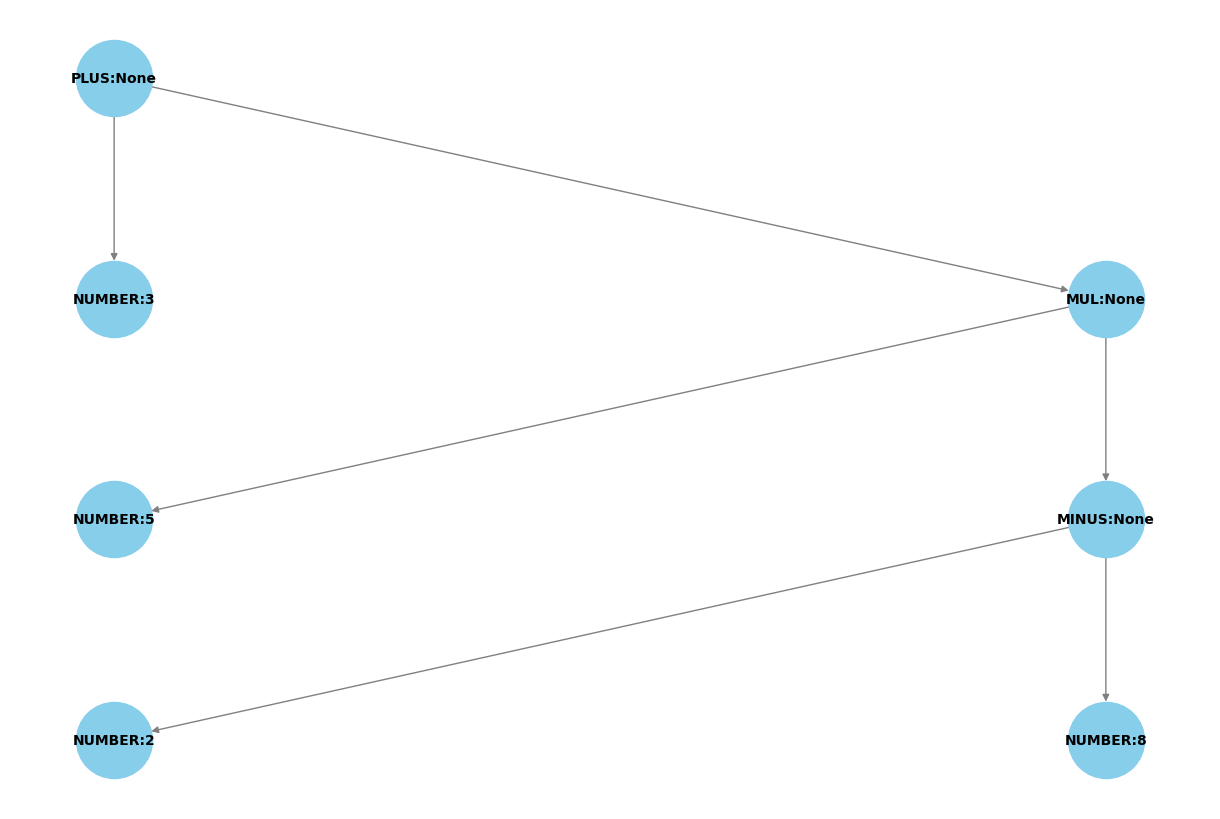

In [5]:
analyzer = SemanticAnalyzer(ast)
analyzer.analyze()

ast_graph, positions = ast_to_networkx(ast)

labels = {node: f"{data['type']}:{data['value']}" for node, data in ast_graph.nodes(data=True)}
plt.figure(figsize=(12, 8))
nx.draw(ast_graph, pos=positions, labels=labels, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.show()

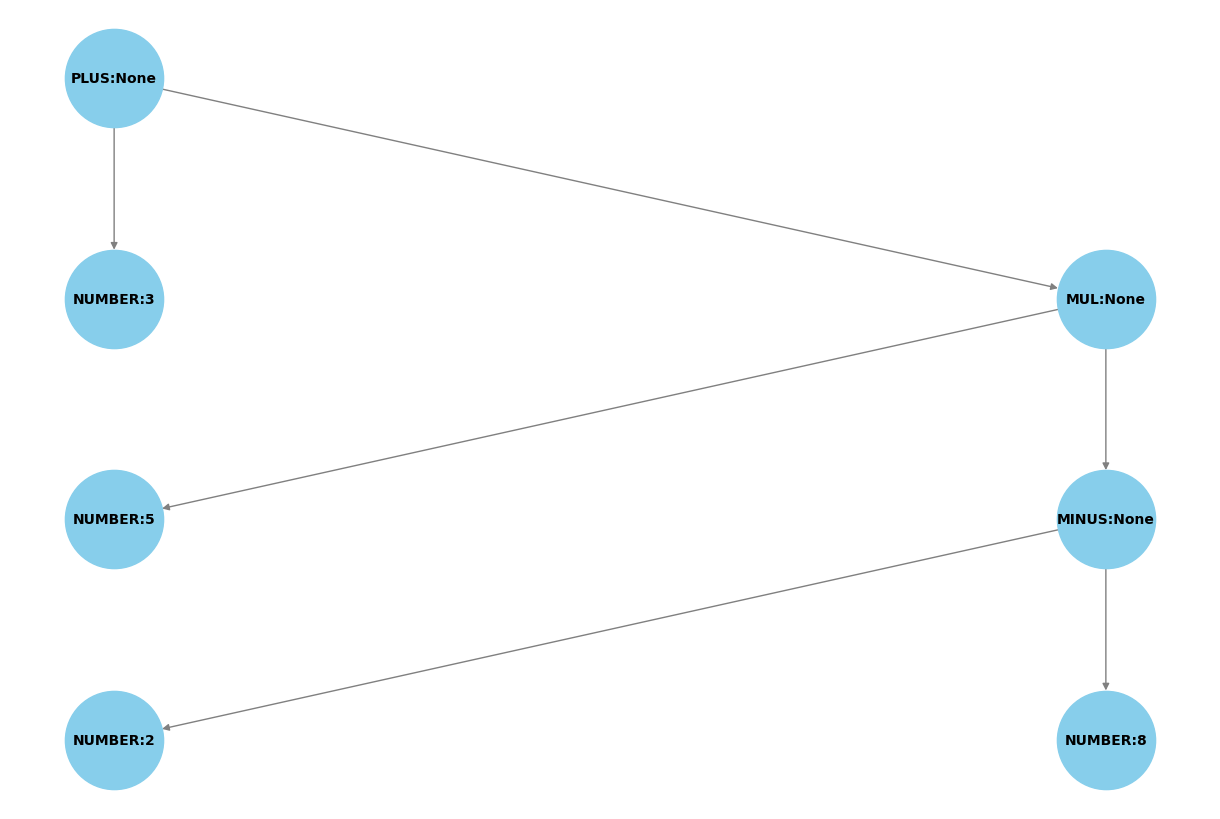

In [6]:
# Test 1 nx print
input_expr = "3 + 5 * (2 - 8)"
tokens = list(lexer(input_expr))
parser = Parser(tokens)
ast = parser.parse()

ast_graph, positions = ast_to_networkx(ast)

pos = nx.spring_layout(ast_graph)
labels = {node: f"{data['type']}:{data['value']}" for node, data in ast_graph.nodes(data=True)}
plt.figure(figsize=(12, 8))
nx.draw(ast_graph, pos=positions, labels=labels, with_labels=True, node_size=5000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.show()

In [7]:
# Test 2
input_expr2 = "(3 + 4) * 5 / 2"
tokens2 = list(lexer(input_expr2))
parser2 = Parser(tokens2)
ast2 = parser2.parse()
print_ast(ast2)

DIV: None
  MUL: None
    PLUS: None
      NUMBER: 3
      NUMBER: 4
    NUMBER: 5
  NUMBER: 2


In [8]:
# Test 3 / will throw unexpected token exception
input_expr3 = "(3 + +) - 12 - 2"
tokens3 = list(lexer(input_expr3))
parser3 = Parser(tokens3)
ast3 = parser3.parse()
print_ast(ast3)

Exception: Unexpected token PLUS

In [ ]:
# Test 4 / 

input_expr4 = "5 / (3 - 3) - 12 - 2"
tokens4 = list(lexer(input_expr4))
parser4 = Parser(tokens4)
ast4 = parser4.parse()

# Semantic analysis step
try:
    analyzer = SemanticAnalyzer(ast4)
    analyzer.analyze()
    print("Semantic analysis passed.")
except Exception as e:
    print(f"Semantic analysis error: {e}")

Visiting minus node: None
Visiting binary_op node: None
Visiting minus node: None
Visiting binary_op node: None
Visiting div node: None
Visiting division_op node: DIV
Visiting number node: 5 and node type is NUMBER
Visiting minus node: None
Visiting binary_op node: None
Visiting number node: 3 and node type is NUMBER
Visiting number node: 3 and node type is NUMBER
The type of the first child is number the type of the second child is number.
The type of the first child is number, the type of the second child is number.
Visiting number node: 12 and node type is NUMBER
The type of the first child is number the type of the second child is number.
Visiting number node: 2 and node type is NUMBER
The type of the first child is number the type of the second child is number.
Semantic analysis passed.


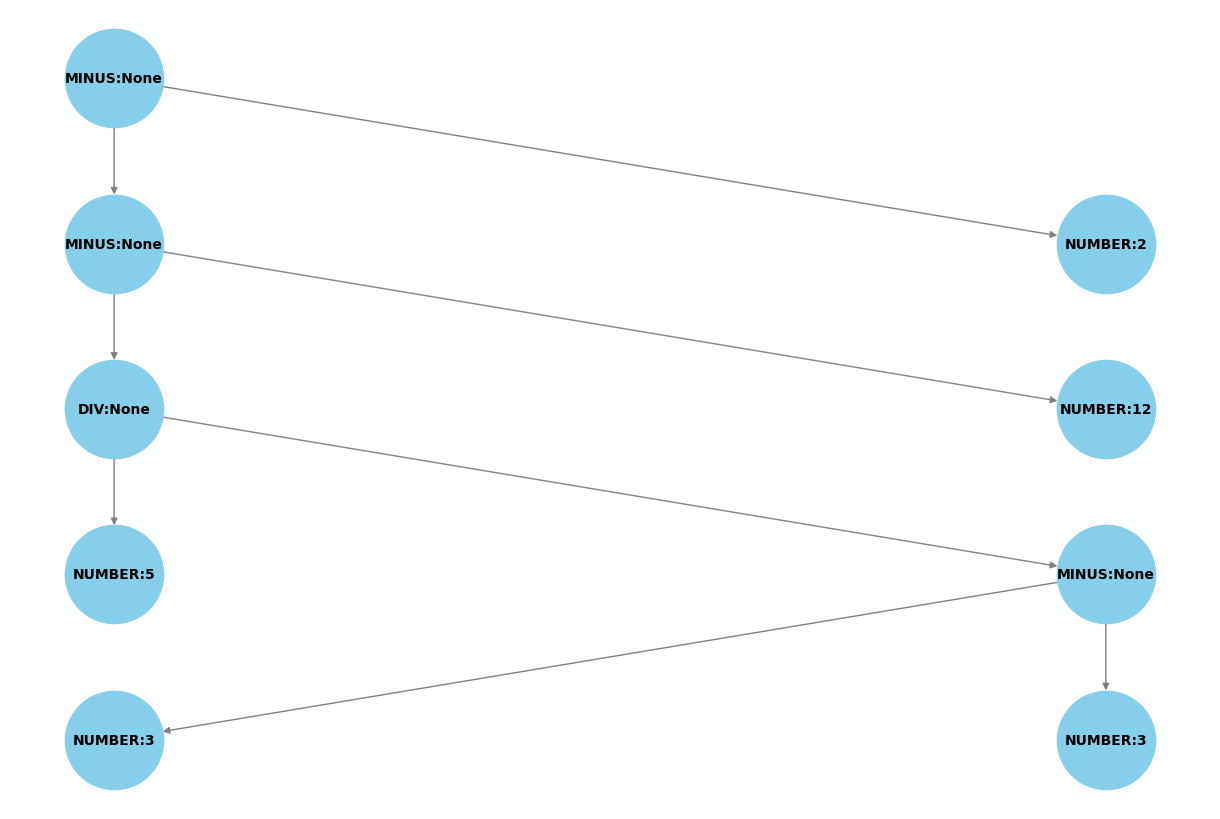

In [ ]:
ast_graph4, positions = ast_to_networkx(ast4)

pos = nx.spring_layout(ast_graph4)
labels = {node: f"{data['type']}:{data['value']}" for node, data in ast_graph4.nodes(data=True)}
plt.figure(figsize=(12, 8))
nx.draw(ast_graph4, pos=positions, labels=labels, with_labels=True, node_size=5000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.show()

In [ ]:
# Example usage
input_expr = "3 + 5 * (2 - 8 / 4)"
tokens = list(lexer(input_expr))
parser = Parser(tokens)
ast = parser.parse()

# Perform semantic analysis
try:
    analyzer = SemanticAnalyzer(ast)
    analyzer.analyze()
    print("Semantic analysis passed.")
except Exception as e:
    print(f"Semantic analysis error: {e}")

# Generate RPN from AST
rpn = generate_rpn(ast)
print("RPN:", rpn)

# Generate Bytecode from RPN
bytecode = generate_bytecode(rpn)
print("Bytecode:", bytecode)

# Convert AST to NetworkX graph and generate positions
ast_graph, positions = ast_to_networkx(ast)

# Draw the graph with data type annotations
labels = {node: f"{data['type']}:{data['value']} ({data['data_type']})" for node, data in ast_graph.nodes(data=True)}
plt.figure(figsize=(12, 8))
nx.draw(ast_graph, pos=positions, labels=labels, with_labels=True, node_size=5000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.show()


Visiting plus node: None
Visiting binary_op node: None
Visiting number node: 3 and node type is NUMBER
Visiting mul node: None
Visiting binary_op node: None
Visiting number node: 5 and node type is NUMBER
Visiting minus node: None
Visiting binary_op node: None
Visiting number node: 2 and node type is NUMBER
Visiting div node: None
Visiting division_op node: DIV
Visiting number node: 8 and node type is NUMBER
Visiting number node: 4 and node type is NUMBER
The type of the first child is number, the type of the second child is number.
The type of the first child is number the type of the second child is number.
The type of the first child is number the type of the second child is number.
The type of the first child is number the type of the second child is number.
Semantic analysis passed.
RPN: ['3', '5', '2', '8', '4', 'DIV', 'MINUS', 'MUL', 'PLUS']


NameError: name 'generate_bytecode' is not defined